<center><h1>Airline Feedback Exploratory Data Analysis</center></h1>
<center><img src="./asset/picture.jpeg"
align="center"></center>

## Introduction
Record consists of 14k+ twitter feedbacks to 6 major US airlines. Motive behind performing exploratory analysis on tweets is to help airline companies improve their service based on the issues faced by the customers in the past.

In [1]:
!pip install kaggle

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [5]:
# Set color palette for plots
color = lambda: random.randint(0, 255)
colors = ['#%02X%02X%02X' %(color(), color(), color()) for i in range(6)]
sns.set_palette(sns.color_palette(colors))

## Download Dataset

Here, we use US airline twitter dataset from [kaggle](https://www.kaggle.com/crowdflower/twitter-airline-sentiment). Set your credentials as env below to authenticate the API's to download dataset.

In [8]:
os.environ['KAGGLE_USERNAME'] = 'xxxxxxxxxxxxxxxxxxxxxxxxxxx'
os.environ['KAGGLE_KEY'] = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'

In [9]:
from kaggle.api.kaggle_api_extended import KaggleApi
from zipfile import ZipFile

os.makedirs('data', exist_ok=True)

api = KaggleApi()
api.authenticate()
api.dataset_download_file('crowdflower/twitter-airline-sentiment', 'Tweets.csv')
zip_file = ZipFile('Tweets.csv.zip')
zip_file.extractall('data')
zip_file.close()
os.remove('Tweets.csv.zip')

In [10]:
df = pd.read_csv('data/Tweets.csv')

In [11]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


## Data Exploration

Let's plot some graphs to infer any useful information from the feedbacks that could help identify areas of improvement for these airline companies.

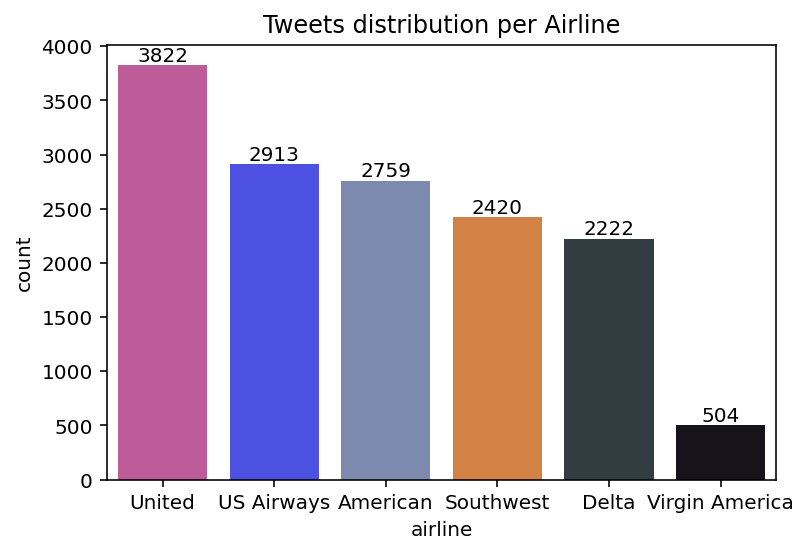

In [25]:
ax = sns.countplot(df["airline"], order=df['airline'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.title('Tweets distribution per Airline')
plt.show()

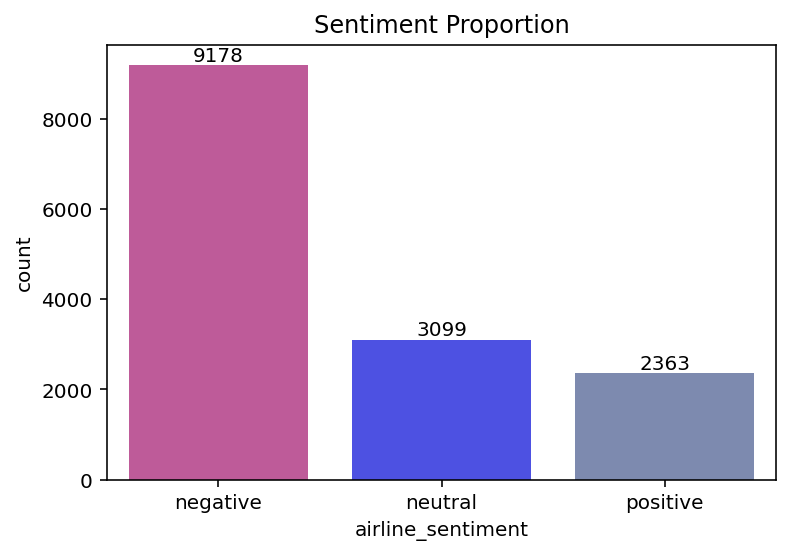

In [27]:
ay = sns.countplot(df['airline_sentiment'], order=df['airline_sentiment'].value_counts().index)
ay.bar_label(ay.containers[0])
plt.title('Sentiment Proportion')
plt.show()

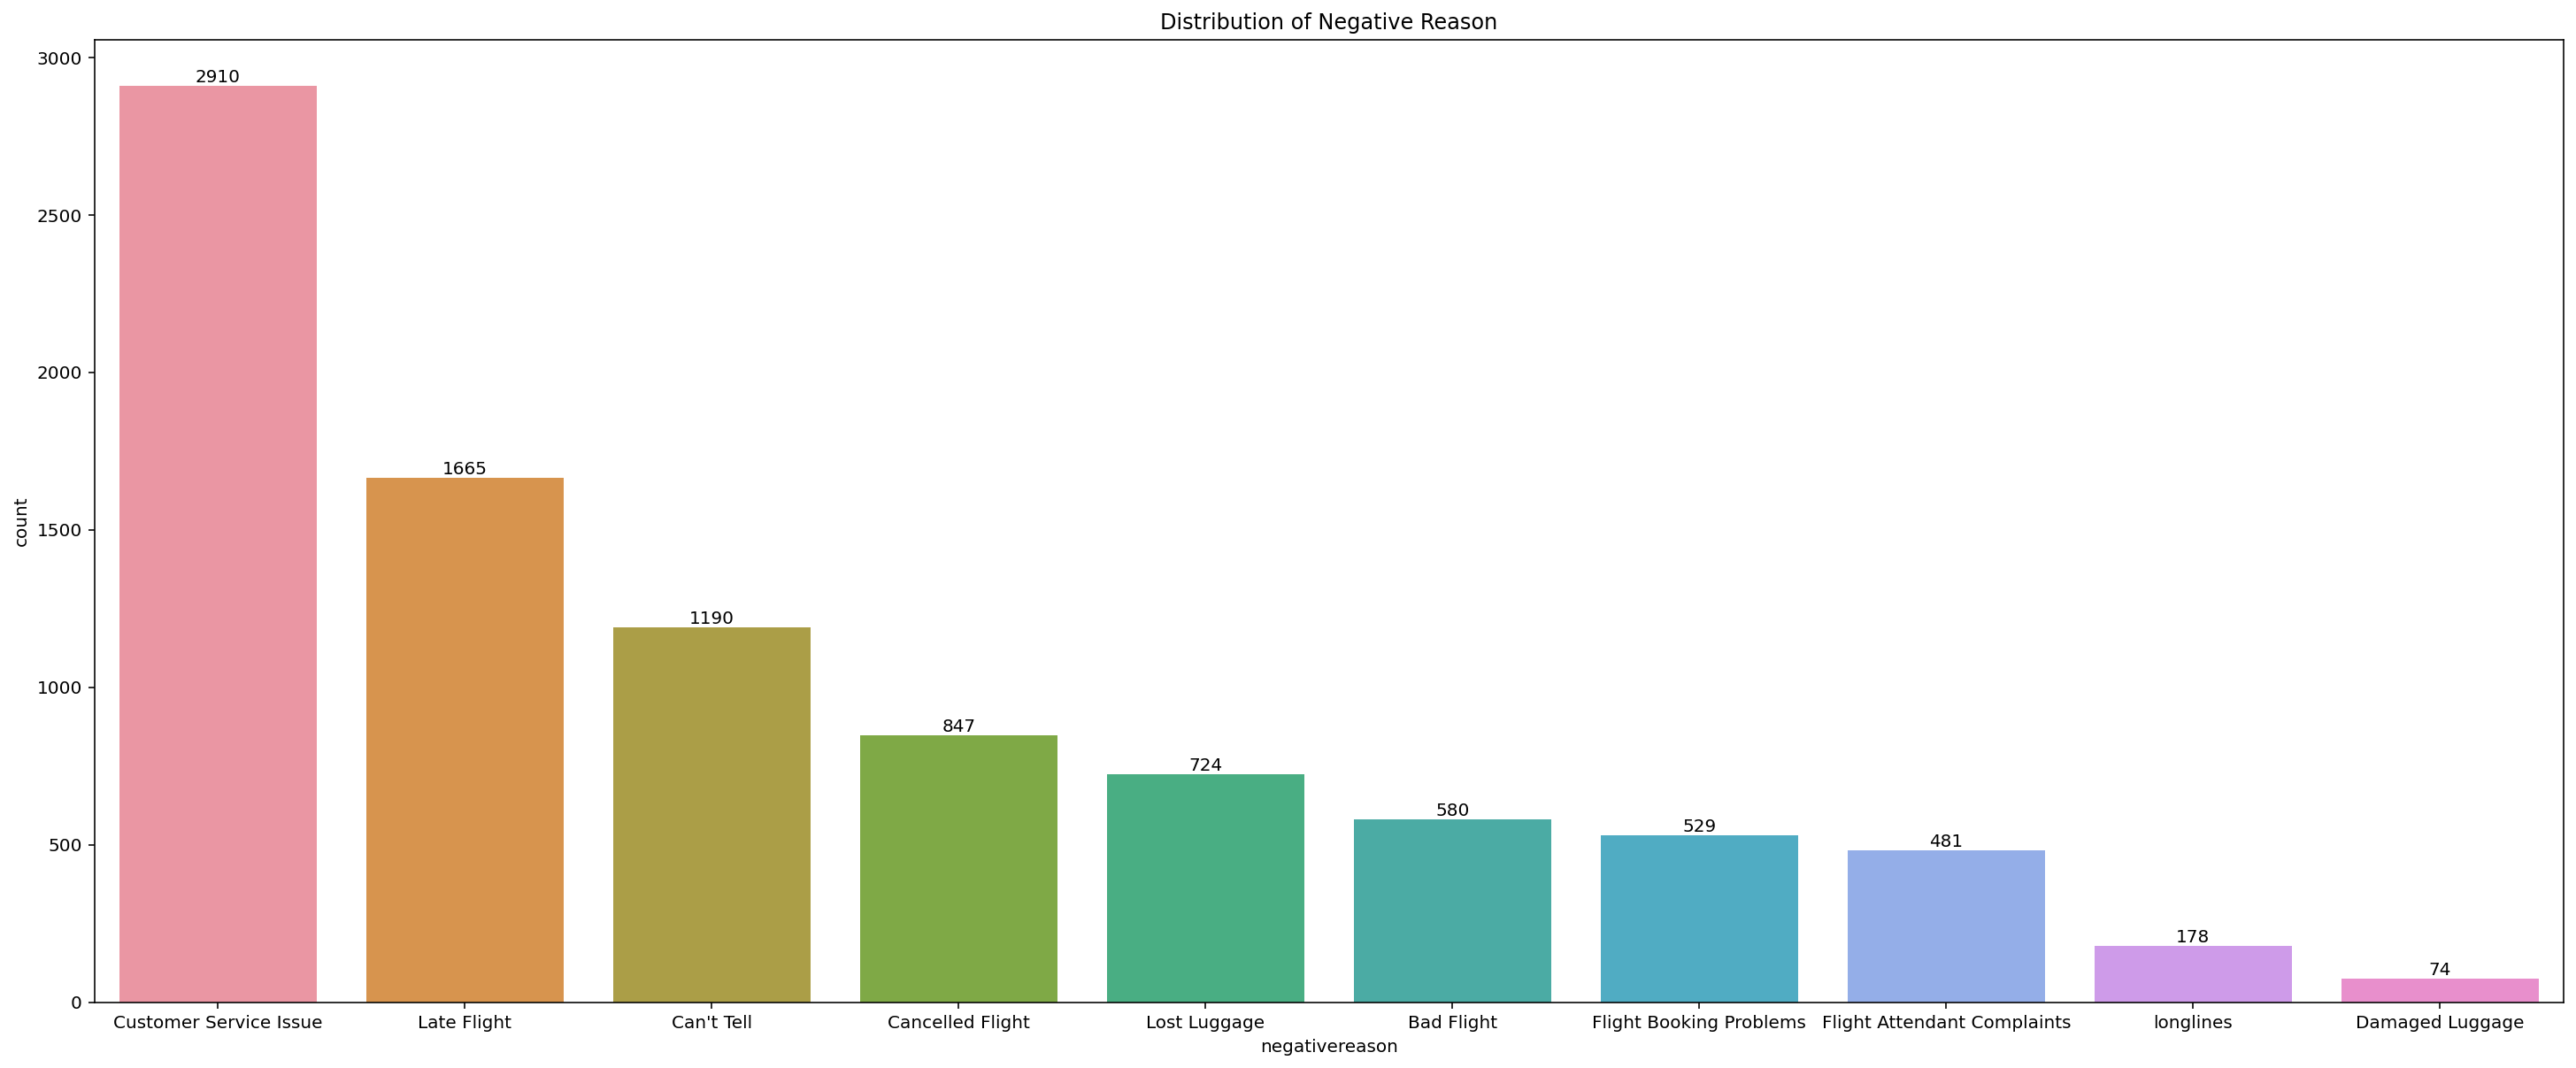

In [33]:
plt.figure(figsize=(25,10))
ax = sns.countplot(df['negativereason'], order=df['negativereason'].value_counts().index)
ax.bar_label(ax.containers[0])
ax.set_title('Distribution of Negative Reason')
plt.show()

As it is seen that, customer service issue accounts for the main reason for negative sentiment followed by delayed flights.

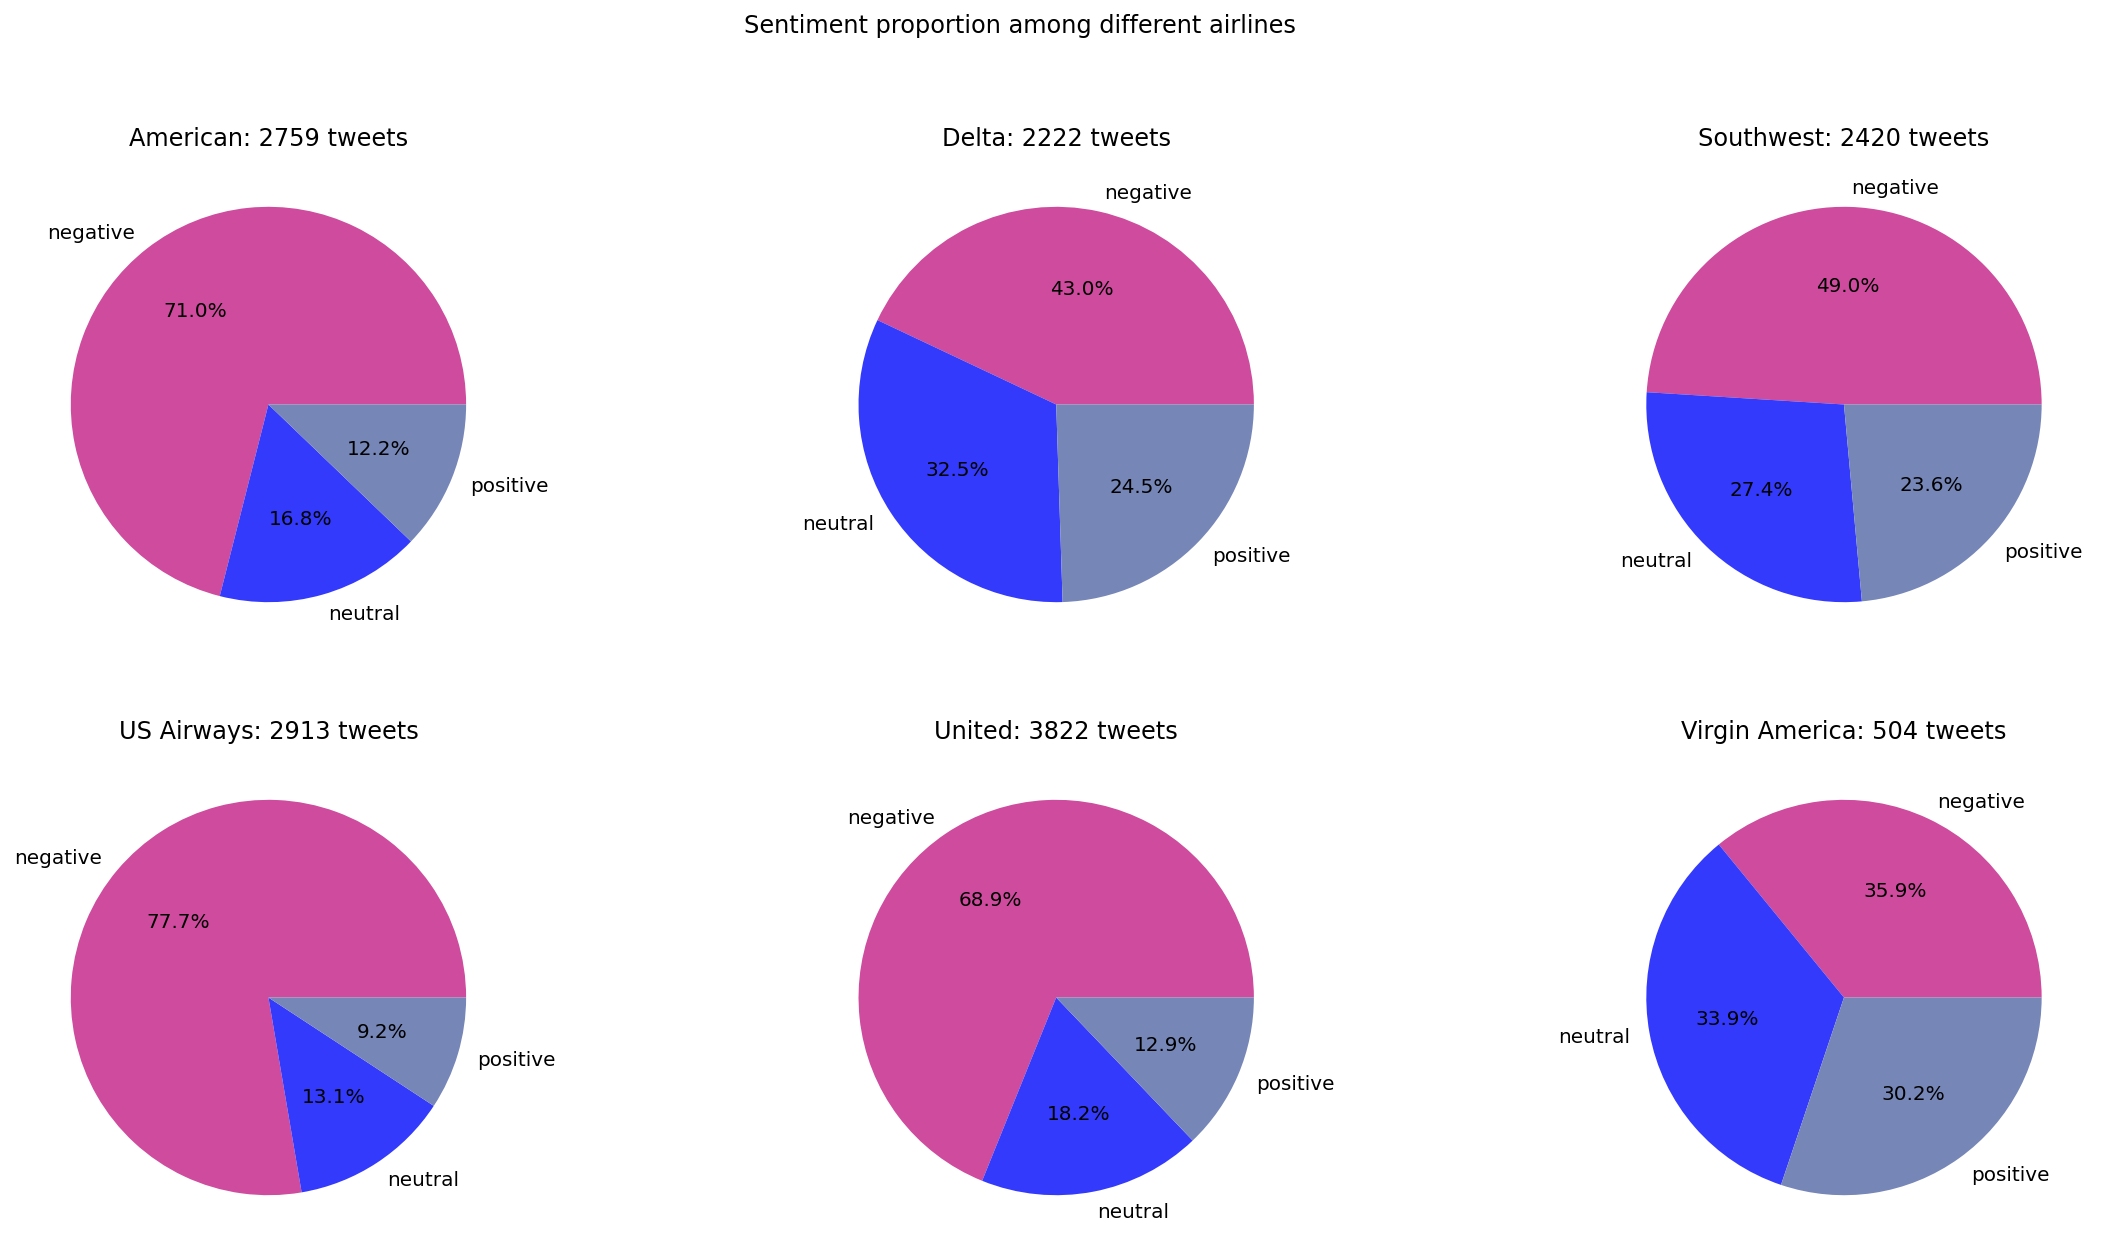

In [53]:
data = df.groupby(['airline', 'airline_sentiment'])['airline_sentiment'].count().unstack()
fig, axes = plt.subplots(2,3, figsize=(20,10))
axes = axes.flatten()
for i, ax in zip(df['airline'].unique(), axes):
    ax.pie(data.iloc[i], labels=data.iloc[i].index, autopct = '%1.1f%%')
    ax.set_title(f"{data.index[i]}: {data.values[i].sum()} tweets")
plt.suptitle('Sentiment proportion among different airlines')
plt.show()

Whilst more than 50% of the feedbacks were negative for most of the airline companies, it is interesting to note that customer feedbacks are almost equally distributed for Virgin America. 

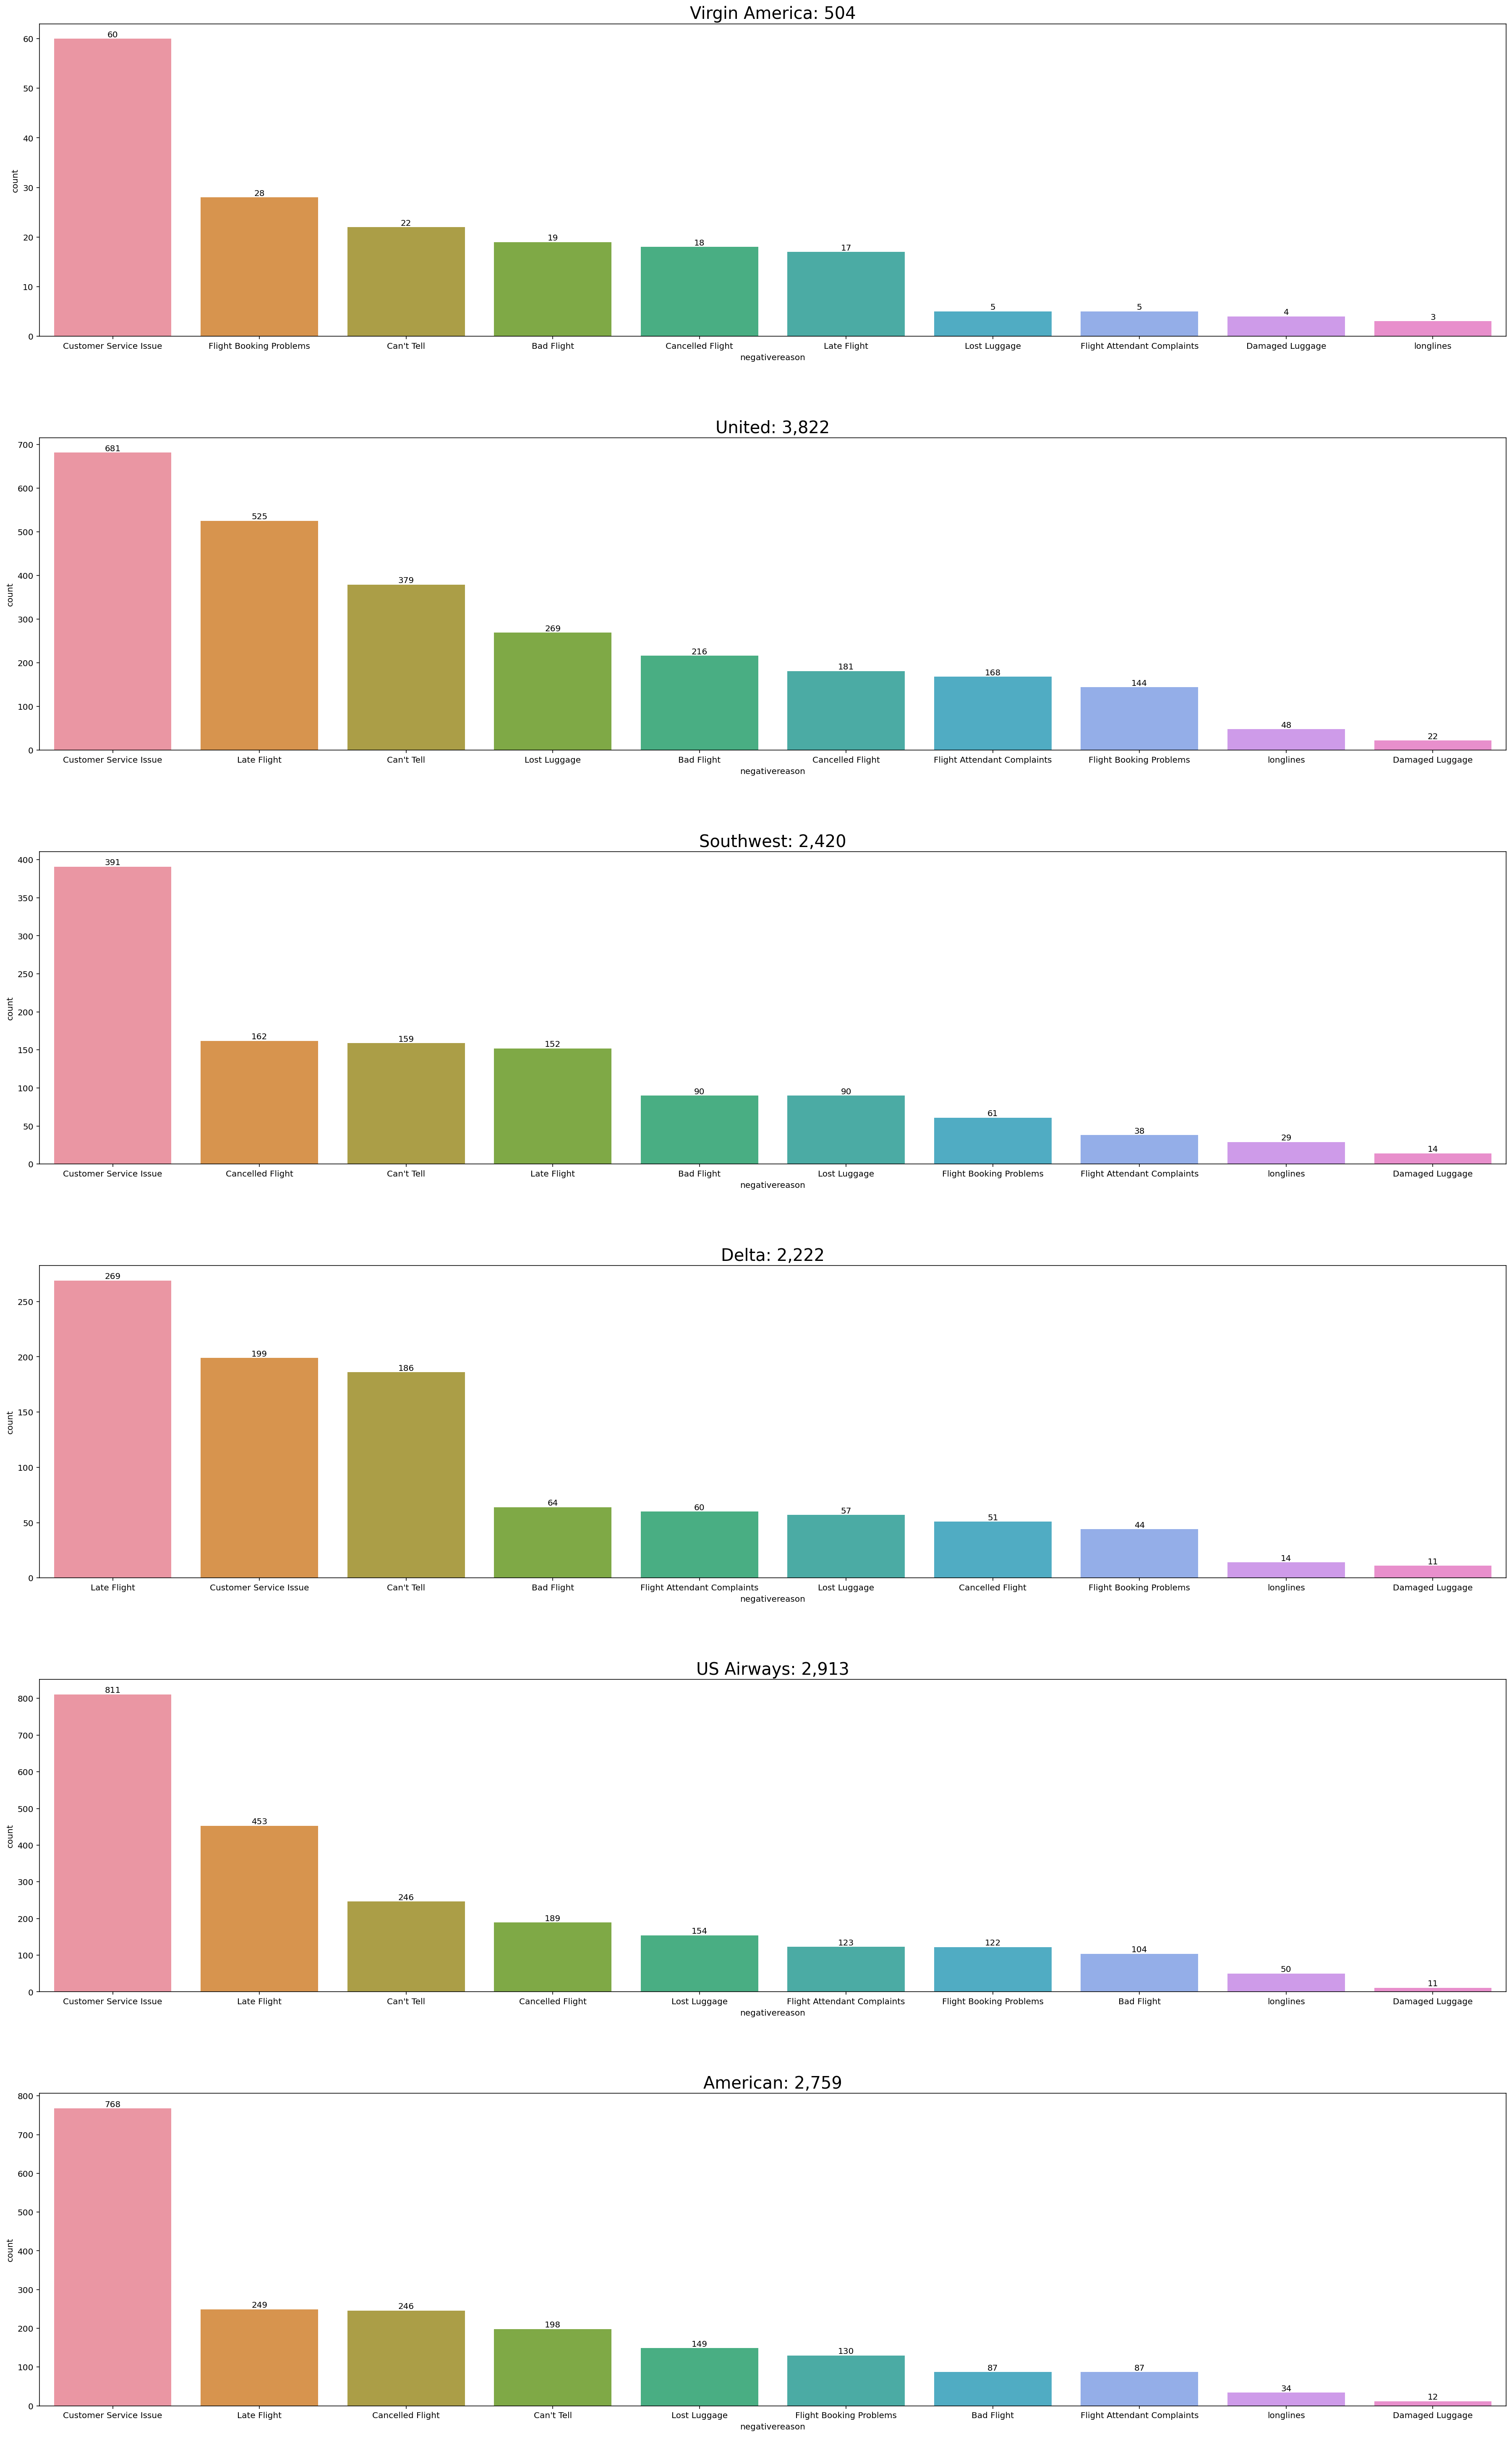

In [76]:
fig, axes = plt.subplots(6,1, figsize=(25,40))
fig.tight_layout(h_pad=10)
axes = axes.flatten()
for i, ax in zip(df.airline.unique(), axes):
    sns.countplot(df[df.airline==i]['negativereason'], order=df[df.airline==i]['negativereason'].value_counts().index, ax=ax)
    ax.bar_label(ax.containers[0])
    ax.set_title(f"{i}: {format(len(df[df.airline==i]),',')}", fontsize=20)
plt.show()

Though, poor customer service is the major issue for American, US Airways, Virgin America and United, but for Delta the most pressing issue is rather delayed flights than customer service. Cancelled flight, late flight and unknown reasons are some of the main reasons for negative sentiment when it comes to Southwest. Customers have also experienced flight booking issues in Virgin America.